In [72]:
from mitchell.mitchell import compute_log
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [73]:
def ilmLog(N):
    if N <= 0:
        return 0
            
    k = math.floor(math.log2(N))
    lower_power = 2 ** k
    
    upper_power = 2 ** (k + 1)
    
    if N - lower_power < upper_power - N:
        return k+N/lower_power-1
    else:
        return k+1-(1-N/upper_power)   

In [74]:
x = [i for i in range(1, 257)]

results = [compute_log(i) for i in x]

y=[res.k+res.x for res in results]
exact=[math.log2(n) for n in x]
proposed=[ilmLog(i) for i in x]

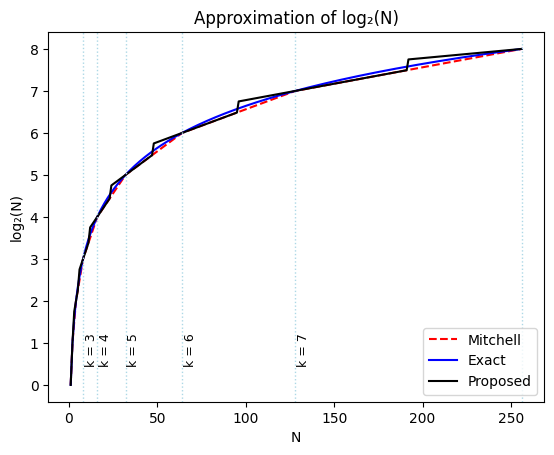

In [75]:
plt.plot(x, y, 'r--', label="Mitchell")  # red dashed
plt.plot(x, exact, 'b-', label="Exact")  # blue solid
plt.plot(x, proposed, color='black', linestyle='-', label="Proposed")

# Vertical lines and vertical labels (excluding last one)
milestones = [8, 16, 32, 64, 128, 256]
k_labels = [3, 4, 5, 6, 7]  # No label for N=256

for i, n in enumerate(milestones):
    plt.axvline(x=n, color='lightblue', linestyle=':', linewidth=1)
    if i < len(k_labels):  # Skip the last label (k=8)
        plt.text(n + 1, 0.5, f'k = {k_labels[i]}', fontsize=9, rotation=90)

plt.xlabel("N")
plt.ylabel("log₂(N)")
plt.title("Approximation of log₂(N)")
plt.legend()
plt.show()


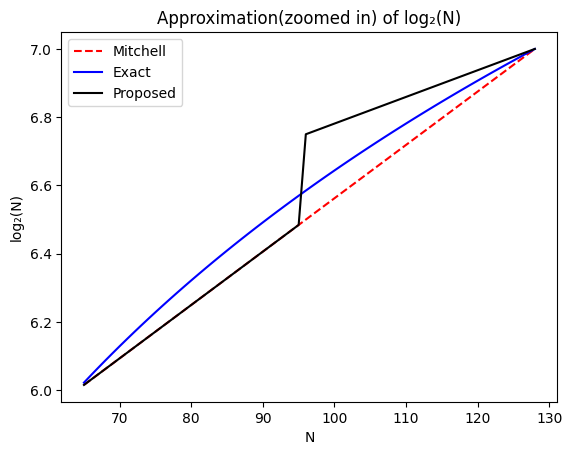

In [76]:
plt.plot(x[64:128], y[64:128], 'r--', label="Mitchell")  # red dashed
plt.plot(x[64:128], exact[64:128], 'b-', label="Exact")  # blue solid
plt.plot(x[64:128], proposed[64:128], color='black', linestyle='-', label="Proposed")

plt.xlabel("N")
plt.ylabel("log₂(N)")
plt.title("Approximation(zoomed in) of log₂(N)")
plt.legend()
plt.show()
